1. Given are two aerial images (IMG1.png, IMG2.png) of an airport parking bay. These images were captured using two cameras placed at different locations and at different instants of time but overlooking the same area. It is known that the images are related by an in-plane rotation and translation.The following point correspondences are given:
                            Correspondence      IMG1 (x, y)     IMG2 (x, y)
                                    1            (29, 124)       (93, 248)
                                    2            (157, 372)      (328, 399)
   
   Determine the changes in IMG2 with respect to IMG1.



Text(0.5, 1.0, 'Changes in the images')

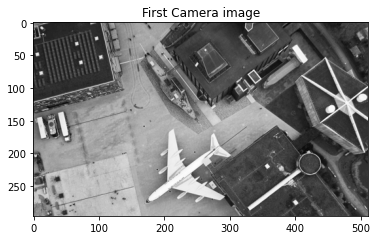

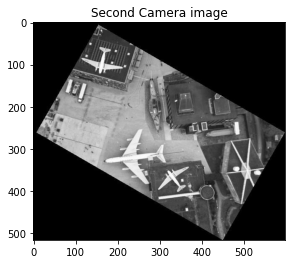

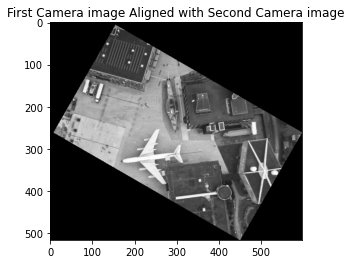

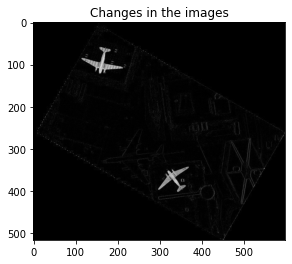

In [6]:
import numpy as np
from matplotlib import pyplot as plt
Cam1Img=plt.imread("IMG1.png")                   #image read
Cam2Img=plt.imread("IMG2.png")                   #image read
plt.figure()
plt.imshow(Cam1Img,cmap='gray')                  #image Display
plt.title("First Camera image")      
plt.figure()
plt.imshow(Cam2Img,cmap='gray')                  #image Display
plt.title("Second Camera image")
srcSize=Cam1Img.shape
SecSize=Cam2Img.shape
'''
    For the transformation :
    (x1,y1)-------------->(X1,Y1)
    (x2,y2)-------------->(X2,Y2)
    
    Homography can be found out by:
    
    | -x1 -y1 -1  0   0   0  x1X1 y1X1 X1 |
    |  0   0   0 -x1 -y1 -1  x1Y1 y1Y1 Y1 | * transpose(|h11 h12 h13 h21 h22 h23 h31 h32 h33 |) = 0
    | -x2 -y2 -1  0   0   0  x2X2 y2X2 X2 |
    |  0   0   0 -x2 -y2 -1  x2Y2 y2Y2 Y2 | 
    
    Since it is known that the images are related by an in-plane rotation and translation,
    
            |cos(angle)   sine(angle) tx| 
            |                           |
        H = |-sine(angle) cos(angle)  ty| 
            |                           |
            |  0            0          1|
            
    Solving Eqns give : cos(angle) =0.86698
                        sine(angle)=0.50010
                        tx         =5.8445
                        ty         =154.996
                      
         

'''
H=np.array([[0.86698,0.50010,5.8445],[-0.50010,0.86698,154.996],[0,0,1]])   #Declaring the homography matrix
H=np.linalg.inv(H)                                                          #taking the inverse for Target to Source mapping
trgtImage=np.zeros(SecSize)                                                 #Declaring Target image with zero values
for i in range(SecSize[0]):                                
    for j in range(SecSize[1]):
        X=np.array([i,j,1])                                                 #Looping over the indices of Target image 
        X2=np.matmul(H,X)                                                   #Find the corresponding indices in the source image using homography
        new_x=X2[0]
        new_y=X2[1]
        X=math.floor(new_x)                                                 #Find X' Y'
        Y=math.floor(new_y)
        a=new_x-X                                                           #Find the deviations from the actual point
        b=new_y-Y
        if(0<X+1<srcSize[0] and 0<Y+1<srcSize[1]):                          #Applying bilinear nterpolation
            trgtImage[i,j]=(1-a)*(1-b)*Cam1Img[X,Y]+(1-a)*(b)*Cam1Img[X,Y+1]+(a)*(1-b)*Cam1Img[X+1,Y]+(a)*(b)*Cam1Img[X+1,Y+1]
plt.figure()
plt.imshow(trgtImage,cmap='gray')
plt.title("First Camera image Aligned with Second Camera image")            #image display
diffImage=abs(Cam2Img-trgtImage)                                            #Finding the difference image
plt.figure()
plt.imshow(diffImage,cmap='gray')                                           #Image display
plt.title("Changes in the images")




Observations:Found the changes in IMG2 with respect to IMG1.